In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

Populating the interactive namespace from numpy and matplotlib


### Problem 1

#### Part 1

In [2]:
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[0.5,0,0],[0,0.5,0],[0,0,0.7]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[0.5,0,0],[0,0.5,0],[0,0,0.01]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
assert class2_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

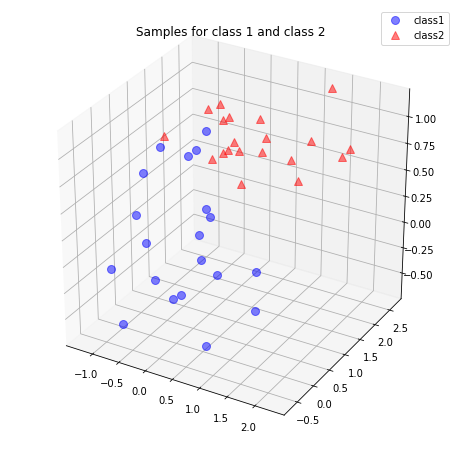

In [3]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

#### Part 2

The points are all scattered in 3D space but because their means are different we can see two different clusters around 0 (which is mean for label 1) and 1 (which is mean for label 2). These two clusters are linearly seperable

#### Part 3

In [4]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (3,40), "The matrix has not the dimensions 3x40"

In [38]:
# Calculating mean of all values
mean_x = np.sum(all_samples[0,:])/len(all_samples[0,:])
mean_y = np.sum(all_samples[1,:])/len(all_samples[1,:])
mean_z = np.sum(all_samples[2,:])/len(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[0.49392045]
 [0.55886447]
 [0.49276975]]


In [6]:
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)
print('Scatter Matrix:\n', scatter_matrix)

Scatter Matrix:
 [[20.85568291  7.68093468  7.50804953]
 [ 7.68093468 38.75410416 10.63331347]
 [ 7.50804953 10.63331347 21.48664316]]


In [45]:
cov_mat = scatter_matrix/(len(all_samples[0,:])-1)
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[0.5347611  0.19694704 0.19251409]
 [0.19694704 0.99369498 0.27264906]
 [0.19251409 0.27264906 0.55093957]]


#### Part 4

In [46]:
# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print(40 * '-')

Eigenvalue 1 from covariance matrix: 1.2235455950552439
----------------------------------------
Eigenvalue 2 from covariance matrix: 0.5116051390092272
----------------------------------------
Eigenvalue 3 from covariance matrix: 0.3442449128573029
----------------------------------------


In [9]:
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv), eig_val_sc[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)


Populating the interactive namespace from numpy and matplotlib


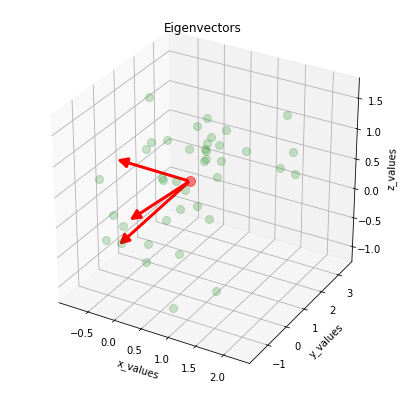

In [10]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

In [11]:
for ev in eig_vec_sc:
    numpy.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))

In [12]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

47.71827820715451
19.95260042135986
13.425551601434815


In [13]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.35806578 -0.68172317]
 [-0.82513655  0.55082201]
 [-0.43696518 -0.48150663]]


In [14]:
transformed = matrix_w.T.dot(all_samples)
assert transformed.shape == (2,40), "The matrix is not 2x40 dimensional."

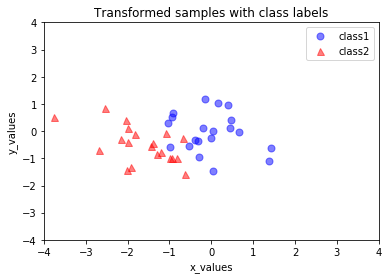

In [15]:
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

#### Yes, PCA made it very easy to distinguish between the two labels in two dimensions 

### Problem 2

In [15]:
import skimage
from skimage import data
from skimage.color import rgb2gray
from skimage import img_as_ubyte,img_as_float
import os
from numpy.linalg import svd
from skimage import io


monas = io.imread('mona_lisa.png')
# Convert RGB to Grayscale
gray_mona = rgb2gray(img_as_float(monas))

gray_images = {'mona':gray_mona}

In [16]:
# Shape of Mona Matrix
gray_mona.shape

(603, 400)

In [17]:
def compress_svd(image,k):
    """
    Perform svd decomposition and truncated (using k singular values/vectors) reconstruction
    returns
    --------
      reconstructed matrix reconst_matrix, array of singular values s
    """
    U,s,V = svd(image,full_matrices=False)
    reconst_matrix = np.dot(U[:,:k],np.dot(np.diag(s[:k]),V[:k,:]))
   
    return reconst_matrix,s

In [18]:
def compress_show_gray_images(img_name,k):
    image=gray_images[img_name]
    original_shape=image.shape
    reconst_img,s = compress_svd(image,k)
    fig,axes = plt.subplots(1,2,figsize=(8,5))
    axes[0].plot(s)
    compression_ratio = 100*(k*(original_shape[0] + 
                               original_shape[1])+k)/(original_shape[0]*original_shape[1])
    axes[1].set_title('compression ratio={:.2f}'.format(compression_ratio)+'%')
    axes[1].imshow(reconst_img,cmap='gray')
    axes[1].axis('off')
    fig.tight_layout()

#### Use the below interactive widget to explore how the quality of the reconstructed image varies with k.

In [19]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

interact(compress_show_gray_images,img_name=list(gray_images.keys()),k=(1,400));

interactive(children=(Dropdown(description='img_name', options=('mona',), value='mona'), IntSlider(value=200, …

#### Best Rank k=2 approximation to Mona Lisa

In [20]:
interact(compress_show_gray_images,img_name=list(gray_images.keys()),k=(1,10));

interactive(children=(Dropdown(description='img_name', options=('mona',), value='mona'), IntSlider(value=5, de…

#### Best Rank k=5 approximation to Mona Lisa

In [21]:
interact(compress_show_gray_images,img_name=list(gray_images.keys()),k=(1,10));

interactive(children=(Dropdown(description='img_name', options=('mona',), value='mona'), IntSlider(value=5, de…

#### Best Rank k=10 approximation to Mona Lisa

In [22]:
interact(compress_show_gray_images,img_name=list(gray_images.keys()),k=(1,10));

interactive(children=(Dropdown(description='img_name', options=('mona',), value='mona'), IntSlider(value=5, de…

In [23]:
from PIL import Image

img = Image.open('mona_lisa.png')
# convert image to grayscale
imggray = img.convert('LA')
# convert to numpy array
imgmat = np.array(list(imggray.getdata(band=0)), float)
# Reshape according to orginal image dimensions
imgmat.shape = (imggray.size[1], imggray.size[0])

# SVD matrices
u, s, v_t = np.linalg.svd(imgmat)


for i in [2, 5, 10]:
    img_r = np.matrix(u[:, :i]) * np.diag(s[:i]) * np.matrix(v_t[:i, :])
    print('bytes for rank {:d}:\t{:d}'.format(i, imgmat.shape[0]*i + imgmat.shape[1]*i))

print('Instead of m x n pixels, each dimension is reduced to rank k. So, (m x k) + (k x n) pixels.')

bytes for rank 2:	2006
bytes for rank 5:	5015
bytes for rank 10:	10030
Instead of m x n pixels, each dimension is reduced to rank k. So, (m x k) + (k x n) pixels.


### Problem 3

Approach:

  1 - Perform SVD on matrix A with tuned rank K
  
  2 - Reconstruct A to get approximation matrix B
  
  3 - Compute std dev of matrix A
  
  4 - Replace values of A that are more than 3 std devs away with their respective approximation from B

In [24]:
corrMat1 = pd.read_csv('CorrMat1.csv', index_col=None, header=None)
corrMat3 = pd.read_csv('CorrMat3.csv', index_col=None, header=None)

print('CorrMat1:')

# convert to numpy array
A = np.array(corrMat1)
print(A.shape)
print('')

# convert to numpy array
A = np.array(corrMat1)

# SVD matrices
u, s, v_t = np.linalg.svd(A)

# reconstruction
k = 5
B = np.matrix(u[:, :k]) * np.diag(s[:k]) * np.matrix(v_t[:k, :])

# computing std dev
stddev = np.std(A)
print('Initial stddev: {:f}'.format(stddev))
print('')

fixes = 0
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        if (A[i, j] > stddev * 3):
            A[i, j] = B[i, j]
            fixes += 1

print('Corrections made: {:d}'.format(fixes))
stddev = np.std(A)
print('Corrected stddev: {:f}'.format(stddev))
print('')


print('CorrMat3:')

# convert to numpy array
A = np.array(corrMat3)
print(A.shape)
print('')

# SVD matrices
u, s, v_t = np.linalg.svd(A)

# reconstruction
k = 5
B = np.matrix(u[:, :k]) * np.diag(s[:k]) * np.matrix(v_t[:k, :])

# computing std dev
stddev = np.std(A)
print('Initial stddev: {:f}'.format(stddev))
print('')

fixes = 0
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        if (A[i, j] > stddev * 3):
            A[i, j] = B[i, j]
            fixes += 1

print('Corrections made: {:d}'.format(fixes))
stddev = np.std(A)
print('Corrected stddev: {:f}'.format(stddev))
print('')

CorrMat1:
(100, 100)

Initial stddev: 2568.370801

Corrections made: 576
Corrected stddev: 2565.939434

CorrMat3:
(100, 100)

Initial stddev: 3739.049417

Corrections made: 2220
Corrected stddev: 3737.629721



In a normal distribution, values which are 3 standard deviation away from the mean can be considered as outliers as their probability of occurence is less than 0.04%. These outiers or corrupted entries are then replaced by original values from matrix B